In [1]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import openturns as ot
%matplotlib inline

sns.set_palette("Blues")
sns.set_context("paper", font_scale=2)
num_samps=100000

# 1. Product Distribution of Normal and Gamma

/home/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


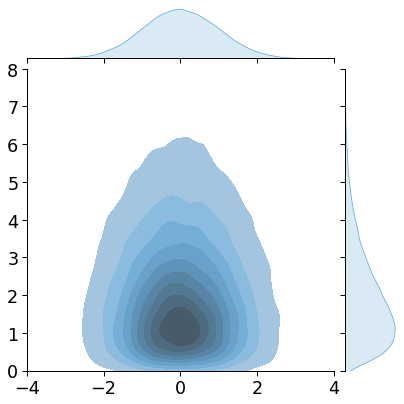

In [2]:
x1 = stats.norm().rvs(num_samps)
x2 = stats.gamma(2).rvs(num_samps)
h = sns.jointplot(x1, x2, kind="kde", shade=True, marginal_kws=dict(fill=True, color=sns.color_palette("Blues", 1)), xlim=(-4,4), ylim=(0, 8))
plt.savefig("plots/copulae/product_NormalGamma.pdf")

# 2. Some Copula 
## 2.1. Independence Copula

/home/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


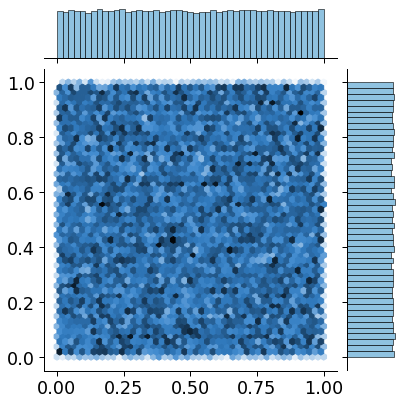

In [3]:
copula = ot.IndependentCopula(2)
c = np.array(copula.getSample(num_samps))
sns.jointplot(c[:, 0], c[:, 1], kind="hex", marginal_kws=dict(color=sns.color_palette("Blues", 1)))
plt.savefig("plots/copulae/IndependenceCopula.pdf")

## 2.2. Gaussian Copula

/home/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


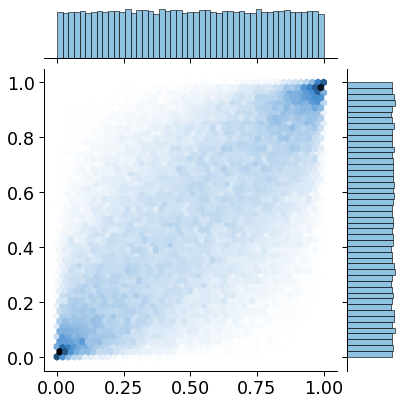

In [4]:
R = ot.CorrelationMatrix(2)
R[0, 1] = 0.7
copula = ot.NormalCopula(R)

c = np.array(copula.getSample(num_samps))

sns.jointplot(c[:, 0], c[:, 1], kind="hex", marginal_kws=dict(color=sns.color_palette("Blues", 1)))
plt.savefig("plots/copulae/GaussianCopula.pdf")

## 2.3. Gumbel Copula

/home/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


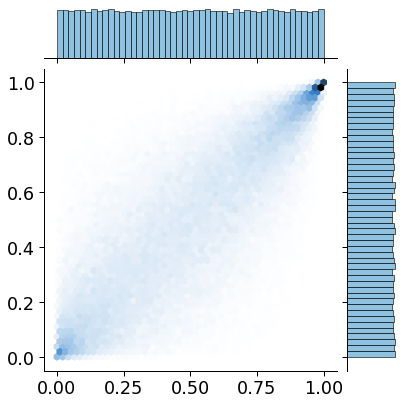

In [5]:
copula = ot.GumbelCopula(2.5)
c = np.array(copula.getSample(num_samps))

sns.jointplot(c[:, 0], c[:, 1], kind="hex", marginal_kws=dict(color=sns.color_palette("Blues", 1)))
plt.savefig("plots/copulae/GumbelCopula.pdf")

# 3. Joint Distribution with Gaussian Copula and Marginals that are Normal and Gamma

/home/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


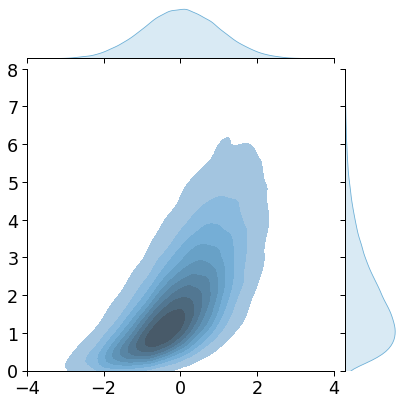

In [6]:
R = ot.CorrelationMatrix(2)
R[0, 1] = 0.7
copula = ot.NormalCopula(R)

c = np.array(copula.getSample(num_samps))

x1_trans = stats.norm().ppf(c[:, 0])
x2_trans = stats.gamma(2).ppf(c[:, 1])

h = sns.jointplot(x1_trans, x2_trans, kind="kde", shade=True, marginal_kws=dict(fill=True, color=sns.color_palette("Blues", 1)), xlim=(-4, 4), ylim=(0, 8))
plt.savefig("plots/copulae/copula_NormalGamma.pdf")

# 4. Clayton Copula and Gumbel Copula are able to model Tail-Dependencies
## 4.1. Clayton Copula

/home/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


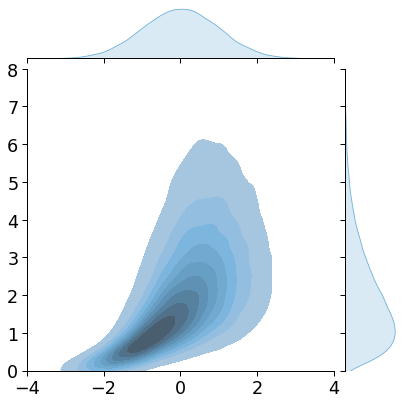

In [7]:
x1 = ot.Normal(0, 1)
x2 = ot.Gamma(2, 1)
marginals = [x1, x2]
copula = ot.ClaytonCopula()
distribution = ot.ComposedDistribution(marginals, copula)
samples = np.array( distribution.getSample(num_samps))

h = sns.jointplot(samples[:, 0], samples[:, 1], kind="kde", shade=True, marginal_kws=dict(fill=True, color=sns.color_palette("Blues", 1)), xlim=(-4, 4), ylim=(0, 8))

plt.savefig("plots/copulae/clayton_NormalGamma.pdf")

## 4.2. Gumbel Copula

/home/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


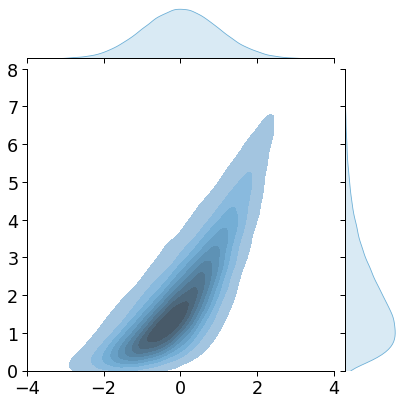

In [8]:
copula = ot.GumbelCopula(2.5)
distribution = ot.ComposedDistribution(marginals, copula)
samples = np.array( distribution.getSample(num_samps))

h = sns.jointplot(samples[:, 0], samples[:, 1], kind="kde", shade=True, marginal_kws=dict(fill=True, color=sns.color_palette("Blues", 1)), xlim=(-4, 4), ylim=(0, 8))
plt.savefig("plots/copulae/gumbel_NormalGamma.pdf")

# 6. Mixture 

/home/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


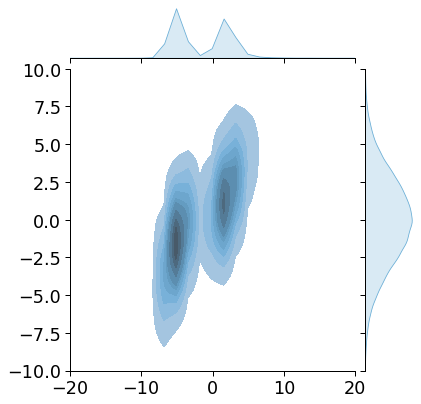

In [9]:
collDist = [ot.Normal(-5, 1), ot.Student(2, 2, 1)]
weight = [0.5, 0.5]
x1 = ot.Mixture(collDist, weight)
x2 = ot.Normal(0, 3)
marginals = [x1, x2]

R = ot.CorrelationMatrix(2)
R[0, 1] = 0.7
copula = ot.NormalCopula(R)
distribution = ot.ComposedDistribution(marginals, copula)
samples = distribution.getSample(num_samps)
samples = np.array(samples)
sns.jointplot(samples[:, 0], samples[:, 1], kind="kde", shade=True, marginal_kws=dict(fill=True, color=sns.color_palette("Blues", 1)), xlim=(-20, 20), ylim=(-10,10))
plt.savefig("plots/copulae/GausCopulaMixtureMarg.pdf")

# 7. Frank Copula

/home/mike/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


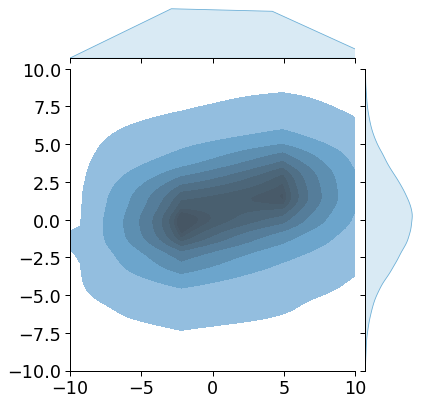

In [10]:
copula = ot.FrankCopula()
distribution = ot.ComposedDistribution(marginals, copula)
samples = np.array( distribution.getSample(num_samps))


sns.jointplot(samples[:, 0], samples[:, 1], kind="kde", shade=True, marginal_kws=dict(fill=True, color=sns.color_palette("Blues", 1)), xlim=(-10, 10), ylim=(-10,10))
plt.savefig("plots/copulae/FrankCopula.pdf")

# 8. Distributions from the Experiments
## 8.1. 2D Heavy-Tailed Distributions
1. Draw Samples

In [11]:
num_samps = 10000
# truth:
copula = ot.GumbelCopula(2.5)
x1 = ot.Student(2, 0, 1)
x2 = ot.Student(2, 0, 1)
true_dist = ot.ComposedDistribution([x1, x2], copula)

true_samp = np.array(true_dist.getSample(num_samps))

copula_base = ot.IndependentCopula(2)

# all normal:
sigma = ot.CovarianceMatrix(2)
mu = ot.Point(2)
normal_dist = ot.Normal(mu, sigma)
normal_samp = np.array(normal_dist.getSample(num_samps))

# Laplace and T with wrong degree of freedom
x1 = ot.Laplace(0, 4)
x2 = ot.Student(5, 0, 2)
laplace_t_dist = ot.ComposedDistribution([x1, x2], copula_base)
laplace_t_samp = np.array(laplace_t_dist.getSample(num_samps))

# T and T with wrong degree of freedom
x1 = ot.Student(5, 0, 2)
x2 = ot.Student(5, 0, 2)
tt_dist = ot.ComposedDistribution([x1, x2], copula_base)
tt_samp = np.array(tt_dist.getSample(num_samps))

# exact correct marginals
x1 = ot.Student(2, 0, 1)
x2 = ot.Student(2, 0, 1)
exact_t_dist = ot.ComposedDistribution([x1, x2], copula_base)
exact_t_samp = np.array(exact_t_dist.getSample(num_samps))

2. Make plots

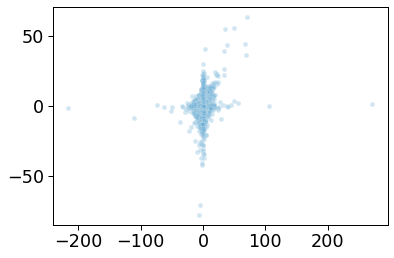

In [12]:
sns.set_palette("Blues", 1)
def plot_jointplot(samples, title):
    #p = sns.jointplot(samples[:, 0], samples[:, 1])
    p = sns.scatterplot(x=samples[:, 0], y=samples[:, 1], alpha=0.3)
    #p.fig.suptitle(title)
    #p.fig.tight_layout()
    #p.fig.subplots_adjust(top=0.95)
    plt.savefig("plots/base_distributions/" + title + ".pdf")
    
sns.set_context("paper", font_scale=2)
plot_jointplot(true_samp, "True distribution")
plot_jointplot(normal_samp, "Normal distribution")
plot_jointplot(laplace_t_samp, "Laplace and T with wrong dof.")
plot_jointplot(tt_samp, "T and T with wrong degree of freedom")
plot_jointplot(exact_t_samp, "Correct marginals")

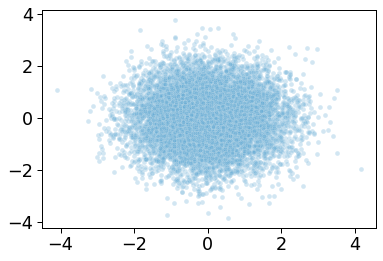

In [13]:
plot_jointplot(normal_samp, "Normal distribution")

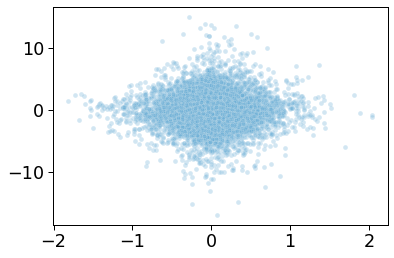

In [14]:
plot_jointplot(laplace_t_samp, "Laplace and T with wrong dof.")

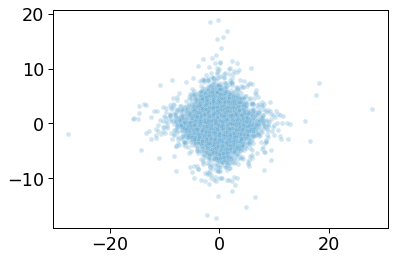

In [15]:
plot_jointplot(tt_samp, "T and T with wrong degree of freedom")

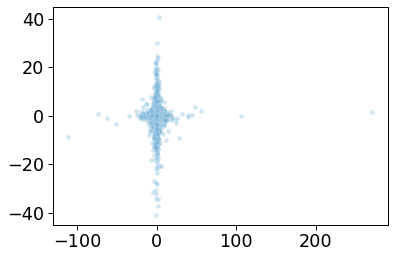

In [16]:
plot_jointplot(exact_t_samp, "Correct marginals")